In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Load the Boston Housing Prices dataset
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

C:\Users\HP PAVILION\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
# Summary statistics of the dataset
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

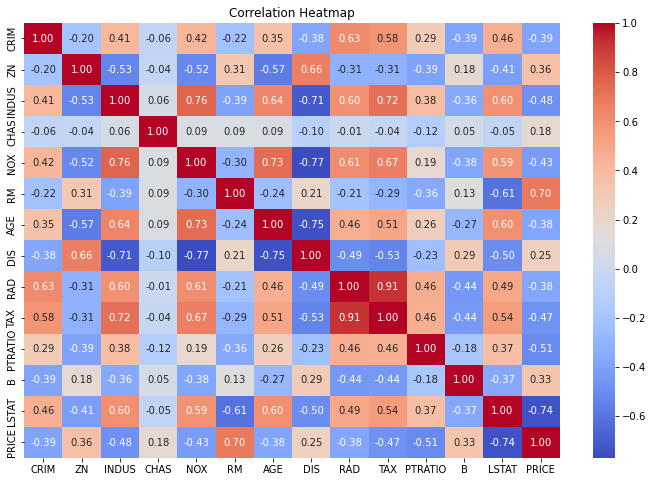

In [4]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

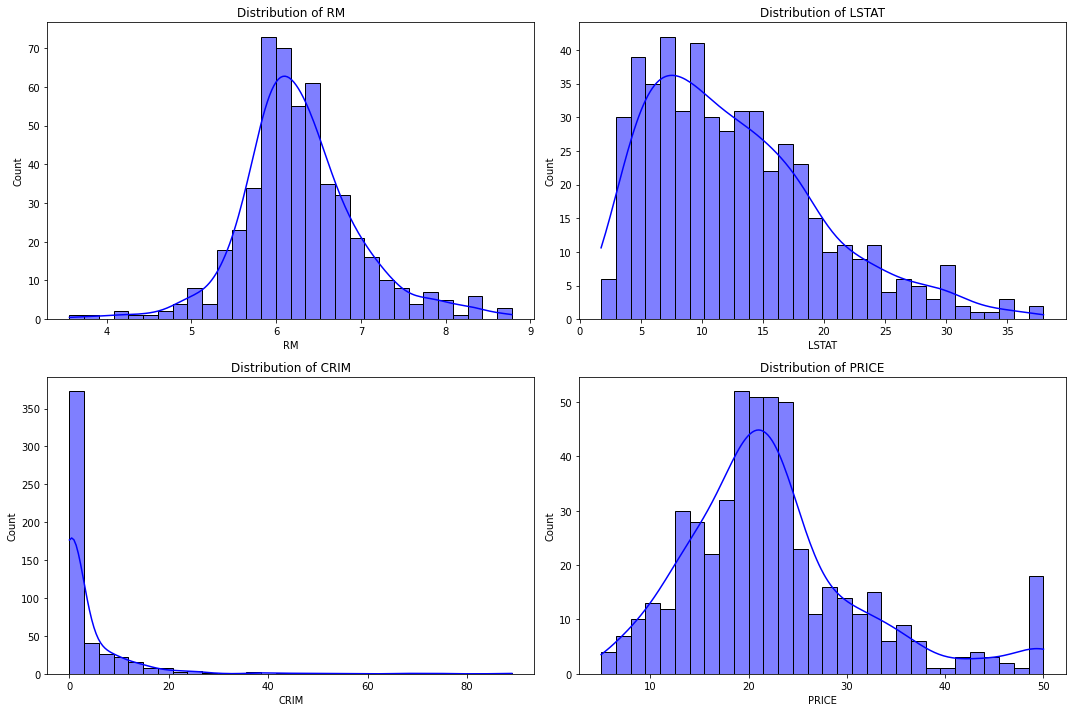

In [5]:
# Histograms of key features
plt.figure(figsize=(15, 10))
features = ['RM', 'LSTAT', 'CRIM', 'PRICE']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30, color='b')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


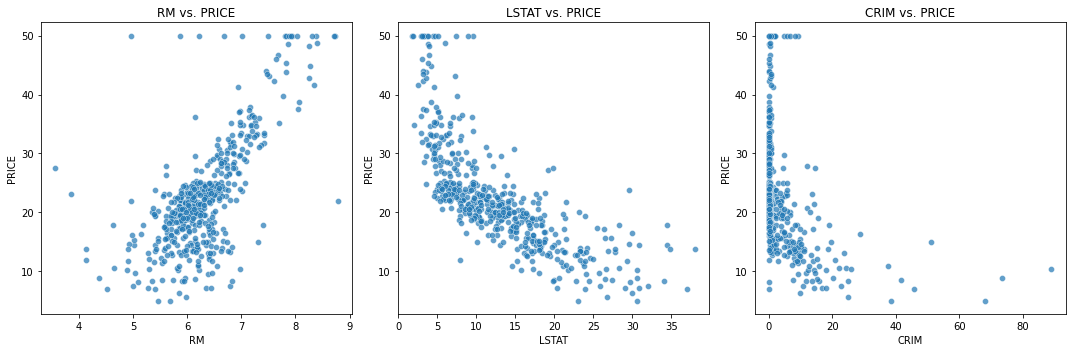

In [6]:
# Scatter plots of key features vs. PRICE
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['RM', 'LSTAT', 'CRIM']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=feature, y='PRICE', data=data, alpha=0.7)
    plt.title(f'{feature} vs. PRICE')
plt.tight_layout()
plt.show()

In [7]:
# Select features and target variable
X = data[['RM', 'LSTAT', 'CRIM']]
y = data['PRICE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [10]:
# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print(f'Linear Regression Coefficients: {model.coef_}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Linear Regression Coefficients: [ 5.59783703 -0.56020274 -0.12416262]
Mean Squared Error (MSE): 32.28
R-squared (R2) Score: 0.56


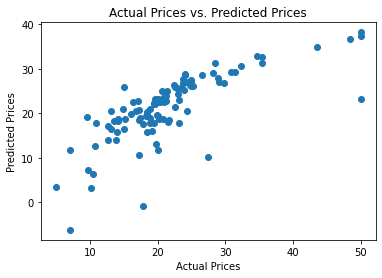

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot the regression line and actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()
plt.savefig("linear-reg-perf.png")